## STAT 207 Lab 2: Data Frames and Statistics

Due: Tuesday, September 8, 23:59:59 CST

Tuan Tran- atran49999999999

This lab consists of 3 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

**The most relevant lectures notes for this lab are "02_dataframe" and "03_quant".**

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

The data file "spam_sample.csv" is included in the release. It contains several quantitative measurements of email messages along with a label (spam=1 or spam=0).

### Part 1 (10 pts)
 

**a) (2 pts) Using python commands, read the data file "spam_sample.csv" into a pandas data frame, being sure to import any libraries that you need.  Display the first 12 rows of the data.**

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam_sample.csv')
df.head(12)

,char_freq_!,char_freq_$,capital_run_length_average,spam
0,0.000,0.000,3.657,0
1,0.000,0.000,3.300,0
2,0.080,0.000,2.396,0
3,0.286,0.000,2.724,0
4,0.000,0.123,2.854,0
5,0.000,0.000,2.187,0
6,0.000,0.000,1.333,0
7,0.000,0.000,2.333,0
8,0.000,0.389,3.476,1
9,0.000,0.000,1.000,0


**b) (2 pts) Notice that in python (pandas) the row numbering starts from index=0 rather than index=1. Using python/pandas commands, display the rows of your data frame with index values =3, 4 and 5.**

In [3]:
df[3:6]

,char_freq_!,char_freq_$,capital_run_length_average,spam
3,0.286,0.000,2.724,0
4,0.000,0.123,2.854,0
5,0.000,0.000,2.187,0


**c) (2 pts) Using python/pandas commands, copy only rows of the data frame for which "char_freq_$" is positive (> 0) into a new data frame, and display the first 12 rows of the new data frame.**

In [4]:
#Creating newdf from df with the condition of positive value for char_freq_$
newdf=df[df["char_freq_$"]>0]
newdf.head(12)

,char_freq_!,char_freq_$,capital_run_length_average,spam
4,0.000,0.123,2.854,0
8,0.000,0.389,3.476,1
13,0.145,0.121,3.575,1
15,0.000,0.094,4.111,1
18,0.278,0.230,3.887,1
19,0.223,0.223,2.021,1
28,0.175,0.467,9.560,1
30,0.751,0.255,4.163,1
39,0.358,0.261,3.554,1
40,0.044,0.134,1.600,0


**d) (2 pts) Using python/pandas commands, find the proportion of spam messages (spam=1) among all the messages that have positive values for "char_freq_$".**

In [5]:
#Using the value_counts function to find the proportion of spam and non-spam messages, calling the result as pro1
pro1=newdf["spam"].value_counts(normalize=True)
pro1

1    0.783333
0    0.216667
Name: spam, dtype: float64

In [19]:
#Using using the iloc function to get the proportion of spam messages (index=0), then printing the resuslt
print('Proportion of spam messages :',pro1.iloc[0])

Proportion of spam messages : 0.7833333333333333


**e) (2 pts) What is the proportion of non-spam messages (spam=0) among all messages that have "char_freq_$" equal to zero? Check using python commands.**

In [7]:
#creating df1 from original dataframe df with the condition of zero value for char_freq_$
df1=df[df['char_freq_$']==0]
#doing the same strategy in problem d
pro2=df1['spam'].value_counts(normalize= True)
pro2

0    0.764286
1    0.235714
Name: spam, dtype: float64

In [8]:
print('Proportion of non-spam messages :',pro2.iloc[0])

Proportion of non-spam messages : 0.7642857142857142


### Part 2 (8 pts)

**This exercise uses the data from Part 1.**

**a) (2 pts) Importing any relevant python libraries, display a density histogram or distribution plot of "capital_run_length_average".**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

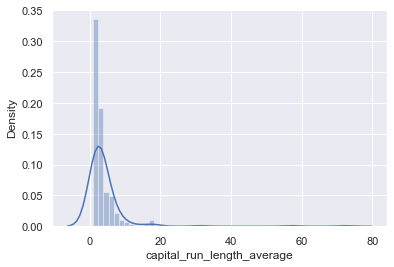

In [10]:
sns.distplot(df["capital_run_length_average"])
plt.xlabel("capital_run_length_average")
plt.ylabel("Density")
plt.show()

**b) (2 pts) Display a density histogram or distribution plot of "capital_run_length_average" for the messages with spam=0 only.**

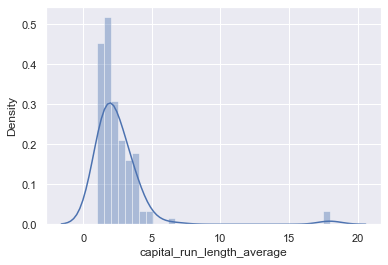

In [11]:
#creating df2 with the condition spam=0
df2=df[df["spam"]==0]["capital_run_length_average"]
sns.distplot(df2)
plt.xlabel("capital_run_length_average")
plt.ylabel("Density")
plt.show()

**c) (2 pts) Display a density histogram or distribution plot of "capital_run_length_average" for the messages with spam=1 only.**

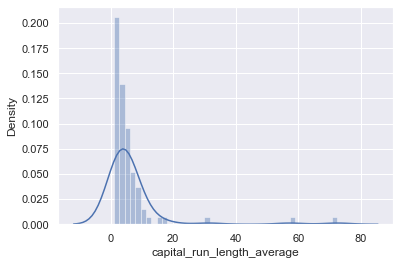

In [12]:
#creating df3 with the condition spam=1
df3=df[df["spam"]==1]["capital_run_length_average"]
sns.distplot(df3)
plt.xlabel("capital_run_length_average")
plt.ylabel("Density")
plt.show()


**d) (2 pts) Explain briefly how the distributions of "capital_run_length_average" differ between the spam messages and the non-spam messages.**

In the histogram with spam=1, the range is larger ( from 1 to 72) than the range in histogram with spam=1 ( from 1 to 18). With a bigger range, the mean value is significantly increased but median will not change much. Therefore, the hitogram with spam=1 is more right-skewed.


### Part 3 (7 pts)

**This exercise uses the data from Part 1.**

**a) (3 pts) Using python commands, compute and display the minimum, maximum, median and first and third quartiles (25th and 75th percentiles) of "capital_run_length_average" for the whole data set.**

In [13]:
#creating the function mysummary
def mysummary(series):
    index = ['Min', 'Max', 'Median', 'First quartile', 'Third quartile']
    value = [series.min(), 
             series.max(),
             series.median(),
             series.quantile(q=0.25), 
             series.quantile(q=0.75),]
    return pd.DataFrame({'value': value}, index=index)

In [14]:
mysummary(df["capital_run_length_average"])

,value
Min,1.00000
Max,72.50000
Median,2.50950
First quartile,1.72775
Third quartile,3.75500


**b) (1 pt) Repeat the computations in a) but only for the spam messages.**

In [15]:
#df3 was created in problem 2c with condition spam=1
mysummary(df3)

,value
Min,1.06400
Max,72.50000
Median,3.84350
First quartile,2.39600
Third quartile,6.09625


**c) (1 pt) Repeat the computations in a) but only for the non-spam messages.**

In [16]:
#df2 was created in problem 2b with condition spam=0
mysummary(df2)

,value
Min,1.00000
Max,18.00000
Median,2.02900
First quartile,1.58375
Third quartile,2.89150


**d) (2 pts) Display side by side box plots or violin plots of "capital_run_length_average" for non-spam and spam messages.** 

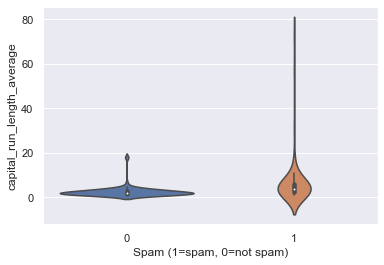

In [17]:
sns.violinplot(x='spam', y='capital_run_length_average', data=df)
plt.xlabel("Spam (1=spam, 0=not spam)")
plt.ylabel("capital_run_length_average")
plt.show()